In [2]:
import pandas as pd
import numpy as np

In [3]:
#import file into jupter notebook
cap2_data2=pd.read_csv('cap2_data2.csv')
cap2_data1=pd.read_csv('cap2_file.csv')


In [4]:
#remove the unnamed column
cap2_data2=cap2_data2.loc[:,~cap2_data2.columns.str.contains('unnamed',case=False)]
cap2_data1=cap2_data1.loc[:,~cap2_data1.columns.str.contains('unnamed',case=False)]

In [5]:
#extract out 1st column('dti' feautre) in cap2_data2 and replace it with the 'dti' feature in cap2_data1
#extract out 2nd column('revol_util' feature) in cap2_data2 and replace it with 'revol_util' feautre in cap2_data1
#cap2_data1 is the clean dataset that i can use to train models
#double check cap2_data1 to see if there is any missing value in it
cap2_data1.dti=cap2_data2.ix[:,0]
cap2_data1.revol_util=cap2_data2.ix[:,1]
print(cap2_data1.isnull().sum())
cap2_data1.shape

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


funded_amnt                   0
term                          0
int_rate                      0
grade                         0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp_inv                 0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
collection_recovery_fee       0
last_pymnt_amnt               0
last_fico_range_high          0
last_fico_range_low           0
collections_12_mths_ex_med    0
applicat

(300276, 40)

In [6]:
# 'term' feature is the combination of numerical and string values 
# remove strings in term feature and leave only numberical numbers 
# define the 'term' column as float type

term_values=cap2_data1.term.values #get the feautre values from dataset
new_values=[] # create an emply list named new_values
for term_value in term_values: # iterate all the values in term feature
    new_value=term_value[0:3]  #keep the first 3 digits of each value and name it new_value
    new_values.append(new_value) # put all new_values in the new_values list
#print(new_values)
cap2_data1.term=new_values # replace the 'term' feature with values in new_values list
cap2_data1.term=cap2_data1.term.astype('float64') # define the column as flost type
print(cap2_data1)

        funded_amnt  term  int_rate grade home_ownership  annual_inc  \
0           16000.0  60.0     14.85     C       MORTGAGE     48000.0   
1           16000.0  36.0     12.88     C       MORTGAGE     65000.0   
2           12000.0  36.0     10.78     B           RENT     98000.0   
3           16800.0  60.0     12.88     C       MORTGAGE    118000.0   
4           16000.0  60.0     13.99     C       MORTGAGE    142000.0   
...             ...   ...       ...   ...            ...         ...   
300271      39975.0  36.0     25.00     D       MORTGAGE         0.0   
300272      13425.0  60.0     15.24     C       MORTGAGE     48000.0   
300273      10000.0  36.0     11.02     B       MORTGAGE    160000.0   
300274      20000.0  60.0     20.00     D       MORTGAGE     55000.0   
300275      10000.0  36.0      8.81     A       MORTGAGE     52116.0   

       verification_status         loan_status pymnt_plan             purpose  \
0             Not Verified          Fully Paid        

          int_rate
issue_y           
2013.0   19.740000
2014.0   17.756613
2015.0   14.128597
2016.0   14.284152
2017.0   13.999344
2018.0   13.675627
2019.0   13.637347


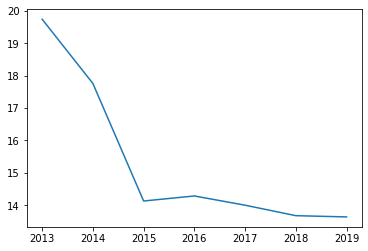

In [7]:
#plot average interest rate trend over years

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

int_rate_data_year=cap2_data1.loc[:,['int_rate','issue_y']] # get the two relevate columns: 'int_rate' & 'issue_y'
int_rate_data_year.int_rate=int_rate_data_year.int_rate.astype('float64') # define the int_rate column as float type
k=pd.pivot_table(int_rate_data_year,values='int_rate',index='issue_y',aggfunc=np.mean) # create pivot table with 'issue_y' as index and 'int_rate' as column and the average intereat rate as value
print(k)

plt.plot(k.index,k.int_rate) # plot the average interest rate trend over years
plt.show() # show the plot

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


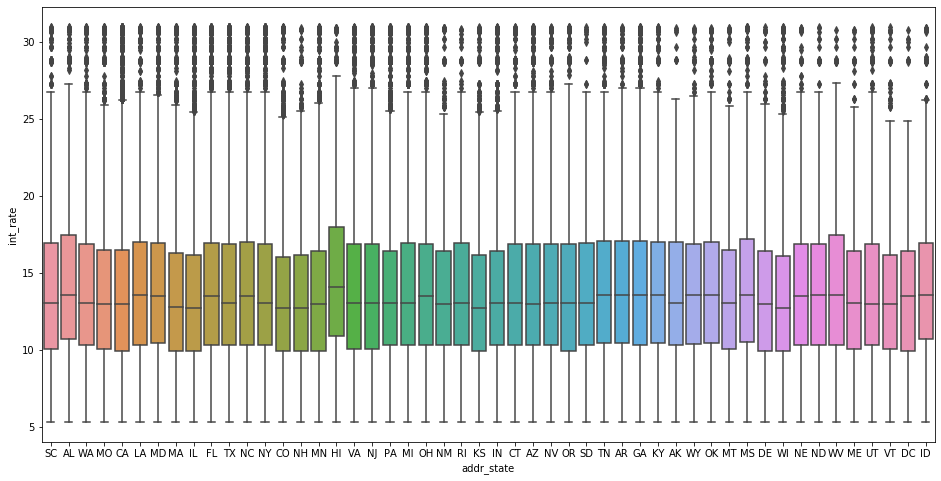

In [8]:
# dealing with string columns
#plot average interest rate by different states

int_rate_data_state=cap2_data1.ix[:,['int_rate','addr_state']] # get relevant columns out of dataset:'int_rate' & 'addr_state'
int_rate_data_state.int_rate=int_rate_data_state.int_rate.astype('float64') # define 'int_rate' column as float type
s=pd.pivot_table(int_rate_data_state,index='addr_state',values='int_rate',aggfunc=np.mean) # create pivot table as 'add_state' as index,'int_rate' as column and average interest rate as value
#print(s)
plt.figure(figsize=[16,8]) # set plot size as 16 by 8
sns.boxplot(x='addr_state',y='int_rate',data=int_rate_data_state) # create box plot of above pivot talbe

In [9]:
# there is no big difference of interst rate by states
# drop 'addr_state' feature from cap2_data1 dataset
cap2_data1.drop('addr_state',axis=1,inplace=True)

In [10]:
#'earliest_cr_line' feature only keeps the year information
# year 2019 data is in a different format and can not be extracted from to_datetime commend
# replace value '2019' with N/A values which are actually year 2019 values
# define 'earliest_cr_line' as float type

cap2_data1.earliest_cr_line=pd.to_datetime(cap2_data1.earliest_cr_line,errors='coerce')
cap2_data1['earliest_cr_line']=cap2_data1.earliest_cr_line.dt.year.fillna('2019')
cap2_data1.earliest_cr_line=cap2_data1.earliest_cr_line.astype('float64')

#print(cap2_data1.earliest_cr_line)

In [11]:
# extract out all the string columns
str_col=cap2_data1.select_dtypes(['object'])
#for item in str_col:
    #print(item)
print(str_col)

       grade home_ownership verification_status         loan_status  \
0          C       MORTGAGE        Not Verified          Fully Paid   
1          C       MORTGAGE        Not Verified         Charged Off   
2          B           RENT        Not Verified          Fully Paid   
3          C       MORTGAGE        Not Verified             Current   
4          C       MORTGAGE            Verified             Current   
...      ...            ...                 ...                 ...   
300271     D       MORTGAGE        Not Verified  Late (31-120 days)   
300272     C       MORTGAGE            Verified             Current   
300273     B       MORTGAGE        Not Verified             Current   
300274     D       MORTGAGE        Not Verified             Current   
300275     A       MORTGAGE            Verified             Current   

       pymnt_plan             purpose initial_list_status application_type  \
0               n         credit_card                   w       Indiv

In [12]:
# use labelEncoder to transform all the string features into numerical values

from sklearn.preprocessing import LabelEncoder


le=LabelEncoder() #initiate LabelEncoder

for col in str_col: # for all columns in str_col
    cap2_data1.ix[:,col]=le.fit_transform(cap2_data1.ix[:,col]) # transfer string values into numerical values 
print(cap2_data1)
print(cap2_data1.shape)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


        funded_amnt  term  int_rate  grade  home_ownership  annual_inc  \
0           16000.0  60.0     14.85      2               1     48000.0   
1           16000.0  36.0     12.88      2               1     65000.0   
2           12000.0  36.0     10.78      1               4     98000.0   
3           16800.0  60.0     12.88      2               1    118000.0   
4           16000.0  60.0     13.99      2               1    142000.0   
...             ...   ...       ...    ...             ...         ...   
300271      39975.0  36.0     25.00      3               1         0.0   
300272      13425.0  60.0     15.24      2               1     48000.0   
300273      10000.0  36.0     11.02      1               1    160000.0   
300274      20000.0  60.0     20.00      3               1     55000.0   
300275      10000.0  36.0      8.81      0               1     52116.0   

        verification_status  loan_status  pymnt_plan  purpose  ...  \
0                         0            3 

In [13]:
#split the dataset into training and testing dataset
cap2_test=cap2_data1.ix[(cap2_data1.issue_y==2015) | (cap2_data1.issue_y==2016)] # year 2015 & 2016 as test dataset
cap2_test_feature=cap2_test.drop('int_rate',axis=1) # drop target variable from test dataset
cap2_test_target=cap2_test.int_rate # set target variable in test dataset
cap2_train=cap2_data1.ix[(cap2_data1.issue_y!=2015) & (cap2_data1.issue_y!=2016)] # year not equal to 2015 and 2016 as training dataset
cap2_train_feature=cap2_train.drop('int_rate',axis=1) # drop target variable from training dataset
cap2_train_target=cap2_train.int_rate

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


In [14]:
cap2_train_feature.head()

,funded_amnt,term,grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,...,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag,issue_y
1703,11200.0,60.0,6,4,44000.0,0,1,0,6,43.97,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0,2018.0
1704,17000.0,60.0,3,4,52000.0,1,1,0,2,15.65,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,2018.0
1705,20000.0,36.0,1,1,19000.0,2,1,0,2,45.17,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0,2018.0
1706,19200.0,60.0,3,4,36500.0,2,1,0,8,19.76,...,3.0,1,0.0,0.0,0.0,0.0,0.0,0,0,2018.0
1707,3100.0,36.0,1,1,85000.0,0,1,0,11,9.12,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,2018.0


<BarContainer object of 38 artists>

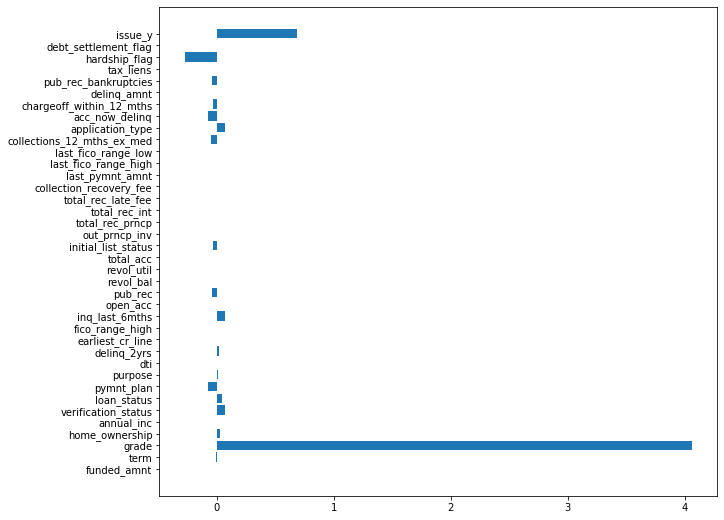

In [15]:
from sklearn.linear_model import LinearRegression # import linear Regression
from scipy import stats

model=LinearRegression() #initiate linear regression model
model.fit(cap2_train_feature,cap2_train_target) # fit the traing dataset into linear regression model
plt.figure(figsize=[10,9]) # set 
plt.barh(cap2_train_feature.columns,model.coef_)
#print(type(model.coef_))

In [16]:
from statsmodels import api as sm
from scipy import stats

lr=sm.OLS(cap2_train_target,cap2_train_feature) #initiate linear regression model
result=lr.fit() # fit the traing dataset into linear regression model
print(result.summary()) # print out summary report

                                 OLS Regression Results                                
Dep. Variable:               int_rate   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          6.895e+05
Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
Time:                        22:28:07   Log-Likelihood:                     -4.6357e+05
No. Observations:              258536   AIC:                                  9.272e+05
Df Residuals:                  258498   BIC:                                  9.276e+05
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [17]:
#drop features that have p-value greater or equal to 0.05
# drop those features from both training and testing dataset
cap2_train_feature_r=cap2_train_feature.drop(['delinq_amnt','chargeoff_within_12_mths','last_fico_range_low','collection_recovery_fee','initial_list_status','revol_bal','pymnt_plan'],axis=1)
cap2_test_feature_r=cap2_test_feature.drop(['delinq_amnt','chargeoff_within_12_mths','last_fico_range_low','collection_recovery_fee','initial_list_status','revol_bal','pymnt_plan'],axis=1)

lr_r=sm.OLS(cap2_train_target,cap2_train_feature_r) # put the new training dataset into linear regression model
result_r=lr_r.fit() #name the training model result as result_r
print(result_r.summary())
cap2_pred=result_r.predict(cap2_test_feature_r) # make predictions on testing dataset
print(cap2_pred) # print out prediction values

                                 OLS Regression Results                                
Dep. Variable:               int_rate   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          8.452e+05
Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
Time:                        22:28:10   Log-Likelihood:                     -4.6359e+05
No. Observations:              258536   AIC:                                  9.272e+05
Df Residuals:                  258505   BIC:                                  9.276e+05
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [18]:
from sklearn.metrics import r2_score # import R-squared from metrics liabrary
from sklearn.metrics import mean_squared_error # import mean squared value from metrics liabrary

r2_score_lr=r2_score(cap2_test_target,cap2_pred) #calculate liner regression R_squared value
print(r2_score_lr) # print out linear regression modelR-squared value
print(mean_squared_error(cap2_test_target,cap2_pred)) # print out linear regression model mean squared value

0.8882406924828788
2.6565221767828793


In [19]:
n=cap2_train_feature_r.shape[0]
k=cap2_train_feature_r.shape[1]
print(n)
print(k)

adj_r2_score_lr=1-(1-r2_score_lr)*((n-1)/(n-k-1))
print(adj_r2_score_lr)

258536
31
0.8882272902201168


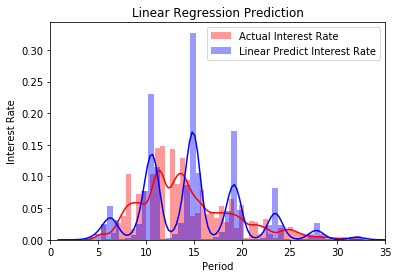

In [23]:
# plot the linear regression prediction VS actual interest rate

plt.figure(figsize=[6,4]) # set plot size
sns.distplot(cap2_test_target,color='red') # plot histgram of actual interst rate
sns.distplot(cap2_pred,color='blue') # plot histgram of linear regression prediction
plt.legend(['Actual Interest Rate','Linear Predict Interest Rate']) # plot legend on the histgram
plt.xlabel('Period') # name the xlabel
plt.ylabel('Interest Rate') # name the ylabel
plt.title('Linear Regression Prediction') #give title to the plot
plt.xlim([0,35]) # set limit to the x-axis
plt.show() # show the plot

In [37]:
from sklearn.linear_model import Lasso  # import lasso regression
from sklearn.model_selection import GridSearchCV # import grid search cross validation

lasso=Lasso() #initiate lasso regression
parameters={'alpha':[0.01,0.1,10,100]} # set different values of alpa parameter
clf=GridSearchCV(lasso,parameters) # launch grid seach cross validation to find best alpha value
clf.fit(cap2_train_feature_r,cap2_train_target) # pass in training dataset


GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
print(clf.best_score_) # print out best cross validation score
print(clf.best_params_) # print out alpha value

0.9246156124823461
{'alpha': 0.01}


In [27]:
# training lasso regression model
from sklearn.linear_model import Lasso

lasso2=Lasso(alpha=0.01) # training lasso regression with best alpha value
feature_coef=lasso2.fit(cap2_train_feature_r,cap2_train_target).coef_  # print out features coefficient
feature_df=pd.DataFrame({'feature_name': cap2_train_feature_r.columns,'coefficient':np.round_(feature_coef,decimals=5)}) # put feature name and coefficent into dataframe
print(feature_df) # print out dataframe

                  feature_name  coefficient
0                  funded_amnt      0.00000
1                         term     -0.00414
2                        grade      4.06178
3               home_ownership      0.01597
4                   annual_inc     -0.00000
5          verification_status      0.05617
6                  loan_status      0.02501
7                      purpose      0.00697
8                          dti      0.00045
9                  delinq_2yrs      0.00549
10            earliest_cr_line      0.00640
11             fico_range_high     -0.00128
12              inq_last_6mths      0.04909
13                    open_acc      0.00391
14                     pub_rec     -0.01512
15                  revol_util      0.00182
16                   total_acc     -0.00159
17               out_prncp_inv     -0.00001
18             total_rec_prncp     -0.00008
19               total_rec_int      0.00021
20          total_rec_late_fee     -0.00027
21             last_pymnt_amnt  

In [24]:
# drop features due to lasso regularization
# drop features whose coefficient values are 0 from both training and testing dataset

cap2_train_feature_r_lasso=cap2_train_feature_r.drop(['funded_amnt','annual_inc','out_prncp_inv','total_rec_prncp','last_pymnt_amnt','collections_12_mths_ex_med','acc_now_delinq','pub_rec_bankruptcies','tax_liens','debt_settlement_flag','hardship_flag'],axis=1)
cap2_test_feature_r_lasso=cap2_test_feature_r.drop(['funded_amnt','annual_inc','out_prncp_inv','total_rec_prncp','last_pymnt_amnt','collections_12_mths_ex_med','acc_now_delinq','pub_rec_bankruptcies','tax_liens','debt_settlement_flag','hardship_flag'],axis=1)


In [28]:
result_lasso=lasso2.fit(cap2_train_feature_r_lasso,cap2_train_target) # fit the further reduced dataset into lasso regression model
cap2_pred_lasso=result_lasso.predict(cap2_test_feature_r_lasso) # use test dataset to make prediction with lasso regression model
r2_score_lsr=r2_score(cap2_test_target,cap2_pred_lasso) #calculate r_squared value of lasso regression
print( r2_score_lsr) # print out lasso regression R-squared value
print(mean_squared_error(cap2_test_target,cap2_pred_lasso)) # print out lasso regression mean squared value

0.9092271336957508
2.1576738237255406


In [29]:
n_lsr=cap2_train_feature_r_lasso.shape[0]
k_lsr=cap2_train_feature_r_lasso.shape[1]
print(n_lsr)
print(k_lsr)

adj_r2_score_lsr=1-(1-r2_score_lsr)*((n_lsr-1)/(n_lsr-k_lsr-1))
print(adj_r2_score_lsr)

258536
20
0.9092201110575051


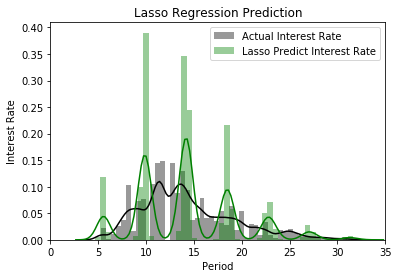

In [31]:
#plot lasso regression prediction VS actual interst rate 

plt.figure(figsize=[6,4]) # set plot size
sns.distplot(cap2_test_target,color='black') # plot histgram of actual interst rate
sns.distplot(cap2_pred_lasso,color='green') # plot histgram of lasso regression prediction
plt.legend(['Actual Interest Rate','Lasso Predict Interest Rate']) # set legend of plot
plt.xlabel('Period') # pass in name of x-axis
plt.ylabel('Interest Rate') # pass in name of y-axis
plt.title('Lasso Regression Prediction') # pass in title of plot
plt.xlim([0,35]) # set limits of x-axis
plt.show() # show the plot

In [53]:
from sklearn.ensemble import RandomForestRegressor # import random forest regressor

rfreg=RandomForestRegressor() #initiate lasso regression
parameters_rf={'n_estimators':[100,130],'max_depth':[35,75]} # set different values of alpa parameter
rf_gs=GridSearchCV(rfreg,parameters_rf) # launch grid seach cross validation to find best alpha value
rf_gs.fit(cap2_train_feature,cap2_train_target) # pass in training dataset
  

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [54]:
print(rf_gs.best_score_) # print out best cross validation score   
print(rf_gs.best_params_) # print out alpha value                        

0.9711360559044829
{'max_depth': 75, 'n_estimators': 130}


In [32]:
from sklearn.ensemble import RandomForestRegressor

rfreg_1=RandomForestRegressor(n_estimators=130,max_depth=75)

In [34]:
from sklearn.ensemble import RandomForestRegressor # import random forest regressor


#initiate random forest regressor
rfreg_1.fit(cap2_train_feature,cap2_train_target) # pass in original dataset into random forest regressor 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=75, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=130, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
cap2_pred_rfreg=rfreg_1.predict(cap2_test_feature) # use test dataset to make predictions using random forest regressor
r2_score_rf=r2_score(cap2_test_target,cap2_pred_rfreg)
print(r2_score_rf) # print out random forest regressor R-squared value
print(mean_squared_error(cap2_test_target,cap2_pred_rfreg)) # print out random forest mean squared value

0.9066497793276502
2.2189376163205186


In [36]:
n_rf=cap2_train_feature.shape[0]
k_rf=cap2_train_feature.shape[1]
print(n_rf)
print(k_rf)

adj_r2_score_rf=1-(1-r2_score_rf)*((n_rf-1)/(n_rf-k_rf-1))
print(adj_r2_score_rf)

258536
38
0.906636056505391


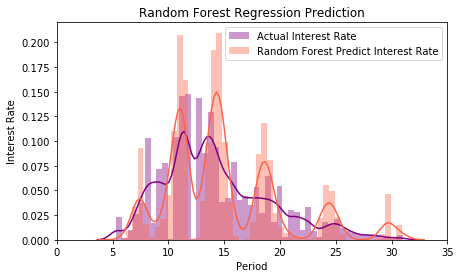

In [52]:
#plot random froest prediction VS actual interst rate 

plt.figure(figsize=[7,4])  # set plot size
sns.distplot(cap2_test_target,color='purple') # plot histgram of actual interst rate
sns.distplot(cap2_pred_rfreg,color='tomato') # plot histgram of random forest prediction
plt.legend(['Actual Interest Rate','Random Forest Predict Interest Rate']) # set legend of plot
plt.xlabel('Period') # pass in name of x-axis
plt.ylabel('Interest Rate') # pass in name of y-axis
plt.title('Random Forest Regression Prediction') # pass in title of plot
plt.xlim([0,35]) # set limits of x-axis
plt.show() # show the plot